<center><h1>Applied Capstone Project</h1></center>



<h2>Introduction and Data Exploration</h2><br>
    Understanding Your Capstone Project<br>
    Setting up Your Github<br>
    Quiz-1: Exploring The Data<br>
    Peer Review: Setting up Github Account For The Project <br><br>
    
<h2>Building Machine learning Model For Accident Severity</h2><br>
    Pre-processing Your Data<br>
    Building your Machine Learning Model<br>
<br><br>
    


<h1>Business Understanding</h1>
<p>This data science study is to predict the severity (1 or 2) of a vehicular accident based on already existing data for the Seattle region. Severity of  1 indicates that there was just property damage. Severity of 2 indicates serious injury or fatality.  The occurrence of each incident is highly dependent on the location  of the accident and the environmental conditions. So we are going to build a data science model where :</p>
<ul><li>Target Label : severity code</li>
<li>Independent variables : X (Latitude), Y (Longitude) , Light Conditions (LIGHTCOND), weather conditions(WEATHER), Road Conditions (ROADCOND)</li></ul>
<p>The <bold>aim of this study is to predict the severity of an accident</bold> given the co-ordinates, weather and road conditions of the location so that the motorists can maintain a certain level of caution when passing the location. This helps avert a significant number of motor vehicle accidents.</p> 
<p>For this study, we are going to be studying accidents data for Seattle City. The project stake holders are the Seattle City corporation for implementation of safety strategies and reduction of fatalities. <b>Stakeholder groups includes state, federal and local government agencies, nongovernmental organisations and regional authorities</b>.</p>  
<p><b>Car and life Insurance companies</b> are benefited from the result to have a knowledge of the most recurring accident type and places. <b>Urgent and   Emergency  care </b> get   data   driven  information  from  this  project   to   plan  schedules  of  emergency  room  and professional to save the life of injured person. <b>Car manufacturers</b> are another beneficiary of this project if they need the information of car crash and Airbag deployment. </p>

<h1>Data Understanding</h1>
<p>The Data Set consists of a record of all accidents. Each row corresponds to a single incident. The main features or attributes that are going to form our training set are:</p>
<ul><li>location</li>
<li>Road Condition</li>
<li>Weather Condition</li>
<li>Junction</li>
<li>Car Speeding</li>
<li>No. of people/vehicles involved</li>
<li>light conditions </li></ul>
<p>On Analysis, the 'speeding' feature has mostly 'na' values and is not really suitable for the training set.<br>
    'Location' feature contains the literal address of the accident location and hence is not a suitable attribute for the feature set.<br>
    'Light conditions' too is a categorical value with too many categories that may impede a proper data model development. <br><br>
'Road Conditions' is a categorical value and comprises<br>
Dry-               124510 <br>
Wet-               47474 <br>
Unknown-            15078 <br>
Ice-                 1209 <br>
Snow/Slush-          1004 <br>
Other-                132 <br>
Standing Water-       115 <br>
Sand/Mud/Dirt-        75 <br>
Oil-                   64  <br><br>

The categorical values for 'Weather' feature are:<br>
Clear-                      111135 <br>
Raining-                      33145<br>
Overcast-                     27714 <br>
Unknown-                      15091 <br>
Snowing-                        907 <br>
Other-                          832 <br>
Fog/Smog/Smoke-                 569 <br>
Sleet/Hail/Freezing Rain-       113<br>
Blowing Sand/Dirt-               56 <br>
Severe Crosswind-                25 <br>
Partly Cloudy-                    5 <br>
    
'JUNCTIONTYPE' categorical values: <br>
    
Mid-Block (not related to intersection)-              89800 <br>
    At Intersection (intersection related)-               62810<br> 
    Mid-Block (but intersection related)-                 22790 <br>
    Driveway Junction-                         10671 <br>
    At Intersection (but not related to intersection)-     2098<br>
    Ramp Junction-                                         166 <br>
    Unknown -                                                 9  <br>
    

Hence the Features that would form a suitable feature set :<br>
[X, Y, ROADCOND, WEATHER, JUNCTIONTYPE, SEVERITYCODE]</p>

In [1]:
import pandas as pd, numpy as np

In [2]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


In [3]:
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-09-22 21:13:42--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

Data-Collisions.csv 100%[===================>]  70.49M  21.5MB/s    in 3.4s    

2020-09-22 21:13:45 (20.7 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



In [4]:
import pandas as pd
df = pd.read_csv('Data-Collisions.csv')

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.shape

(194673, 38)

In [6]:
df.head()
#X                   5334
#Y                   5334
#ROADCOND            5012
#WEATHER             5081
#JUNCTIONTYPE        6329

df['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

Original Shape: (194673, 38)


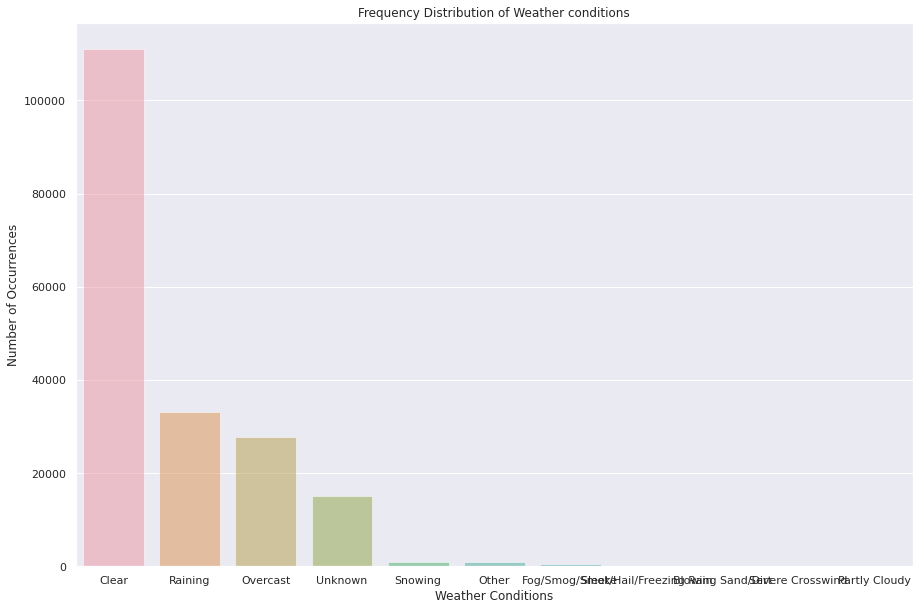

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Original Shape:", df.shape)
df.columns

weather_count = df['WEATHER'].value_counts()
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(weather_count.index, weather_count.values, alpha=0.5)
plt.title('Frequency Distribution of Weather conditions')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Weather Conditions', fontsize=12)

plt.show()


In [8]:
df_actual = df[['X', 'Y', 'ROADCOND', 'WEATHER', 'JUNCTIONTYPE', 'SEVERITYCODE']]
df_actual.shape

(194673, 6)

In [9]:
df_actual.shape
df_actual[['ROADCOND']].isna().sum()

#Data cleaning, removing all 'na'
df_actual = df_actual[pd.notnull(df['X'])]
df_actual = df_actual[pd.notnull(df['ROADCOND'])]
df_actual = df_actual[pd.notnull(df['WEATHER'])]
df_actual = df_actual[pd.notnull(df['JUNCTIONTYPE'])]
df_actual = df_actual[pd.notnull(df['SEVERITYCODE'])]
print("(rows,columns): ",df_actual.shape)

(rows,columns):  (180271, 6)


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [10]:
#removing rows with unknown value
df_actual = df_actual[df_actual.ROADCOND != 'Unknown']
df_actual = df_actual[df_actual.WEATHER != 'Unknown']
df_actual = df_actual[df_actual.JUNCTIONTYPE != 'Unknown']

#removing rows with Other value
df_actual = df_actual[df_actual.ROADCOND != 'Other']
df_actual = df_actual[df_actual.WEATHER != 'Other']
df_actual = df_actual[df_actual.JUNCTIONTYPE != 'Other']

print("(rows,columns): ",df_actual.shape)
df_actual.head(10)

(rows,columns):  (167143, 6)


,X,Y,ROADCOND,WEATHER,JUNCTIONTYPE,SEVERITYCODE
0,-122.323148,47.703140,Wet,Overcast,At Intersection (intersection related),2
1,-122.347294,47.647172,Wet,Raining,Mid-Block (not related to intersection),1
2,-122.334540,47.607871,Dry,Overcast,Mid-Block (not related to intersection),1
3,-122.334803,47.604803,Dry,Clear,Mid-Block (not related to intersection),1
4,-122.306426,47.545739,Wet,Raining,At Intersection (intersection related),2
5,-122.387598,47.690575,Dry,Clear,At Intersection (intersection related),1
6,-122.338485,47.618534,Wet,Raining,At Intersection (intersection related),1
7,-122.320780,47.614076,Dry,Clear,At Intersection (intersection related),2
8,-122.335930,47.611904,Dry,Clear,Mid-Block (not related to intersection),1
9,-122.384700,47.528475,Dry,Clear,At Intersection (intersection related),2


In [11]:
#converting ROADCOND,JUNCTIONTYPE, WEATHER (categorical variables) into numerical values 
roadcond= pd.Series(df_actual.ROADCOND, dtype='category')
print(pd.DataFrame(roadcond.cat.categories))

jtype = pd.Series(df_actual.JUNCTIONTYPE, dtype='category')
print(pd.DataFrame(jtype.cat.categories))

weather = pd.Series(df_actual.WEATHER, dtype='category')
print(pd.DataFrame(weather.cat.categories))

                0
0             Dry
1             Ice
2             Oil
3   Sand/Mud/Dirt
4      Snow/Slush
5  Standing Water
6             Wet
                                                   0
0  At Intersection (but not related to intersection)
1             At Intersection (intersection related)
2                                  Driveway Junction
3               Mid-Block (but intersection related)
4            Mid-Block (not related to intersection)
5                                      Ramp Junction
                          0
0         Blowing Sand/Dirt
1                     Clear
2            Fog/Smog/Smoke
3                  Overcast
4             Partly Cloudy
5                   Raining
6          Severe Crosswind
7  Sleet/Hail/Freezing Rain
8                   Snowing


In [12]:
df_actual.ROADCOND = df_actual.ROADCOND.astype('category').cat.codes
df_actual.JUNCTIONTYPE = df_actual.JUNCTIONTYPE.astype('category').cat.codes
df_actual.WEATHER = df_actual.WEATHER.astype('category').cat.codes

df_actual.head()

,X,Y,ROADCOND,WEATHER,JUNCTIONTYPE,SEVERITYCODE
0,-122.323148,47.703140,6,3,1,2
1,-122.347294,47.647172,6,5,4,1
2,-122.334540,47.607871,0,3,4,1
3,-122.334803,47.604803,0,1,4,1
4,-122.306426,47.545739,6,5,1,2


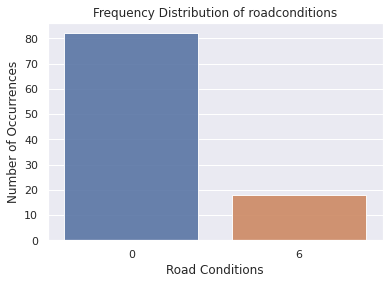

In [13]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
df_actual_100 = df_actual.head(100)
df_actual_200 = df_actual.head(200)
roadcond_count = df_actual_100['ROADCOND'].value_counts()
sns.set(style="darkgrid")
sns.barplot(roadcond_count.index, roadcond_count.values, alpha=0.9)
plt.title('Frequency Distribution of roadconditions')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Road Conditions', fontsize=12)
plt.show()

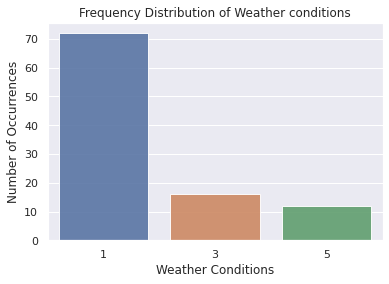

In [14]:
df_actual['ROADCOND'].value_counts()

weather_count = df_actual_100['WEATHER'].value_counts()
sns.set(style="darkgrid")
sns.barplot(weather_count.index, weather_count.values, alpha=0.9)
plt.title('Frequency Distribution of Weather conditions')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Weather Conditions', fontsize=12)
plt.show()

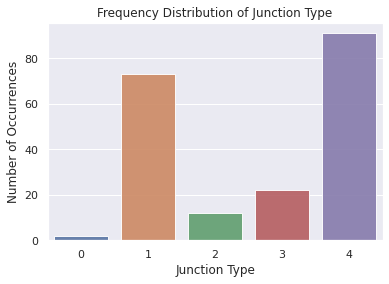

In [15]:
junctiontype_count = df_actual_200['JUNCTIONTYPE'].value_counts()
sns.set(style="darkgrid")
sns.barplot(junctiontype_count.index, junctiontype_count.values, alpha=0.9)
plt.title('Frequency Distribution of Junction Type')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Junction Type', fontsize=12)
plt.show()

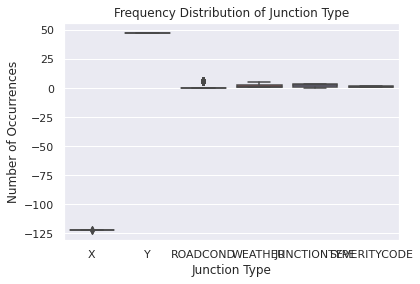

In [16]:
junctiontype_count = df_actual_200['JUNCTIONTYPE'].value_counts()
sns.set(style="darkgrid")
sns.boxplot(data=df_actual_200)
plt.title('Frequency Distribution of Junction Type')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Junction Type', fontsize=12)
plt.show()

In [17]:
#Mapping the accident sites in Seattle

#!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')
latitude = 47.63
longitude = -122.32


Folium installed and imported!


In [18]:
washington_map = folium.Map(location=[latitude, longitude], zoom_start=10, tiles='Stamen Terrain')

# display world map
washington_map

In [19]:
df_actual_200 = df_actual.head(200)
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, svrcode in zip(df_actual_200.Y, df_actual_200.X, df_actual_200.SEVERITYCODE):
    if (svrcode == 2):
        incidents.add_child(
            folium.features.CircleMarker(
                [lat, lng],
                radius=2, # define how big you want the circle markers to be

                                color='black',
                #fill=True,
                #fill_color='yellow',
                #fill_opacity=0.6
            )
        )
    if (svrcode == 1):
        incidents.add_child(
            folium.features.CircleMarker(
                [lat, lng],
                radius=2, # define how big you want the circle markers to be
                color='blue',
            )
        )
# add incidents to map
washington_map.add_child(incidents)

<h1> Methodology </h1>
In the above choropleth map we can see that all the black circles correspond to incidents of severity code 2 and all blue dots correspond to severity 1. Since we have the Longitudes and Latitudes as numeric values,we can plot a scatter plot indicating the same on a graph. Since the  target label in in case is a categorical variable with discrete values, we will develop a model based on classification techniques.

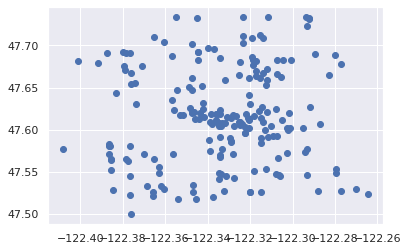

<Figure size 720x720 with 0 Axes>

In [20]:
plt.scatter(df_actual_200.X, df_actual_200.Y)
plt.figure(figsize=(10,10))
plt.show()

In [21]:
#CLASSIFICATION
#Using the K-Nearest Neighbors Algorithm, we can train and test the model
df_actual_200 = df_actual.head(200)
#df_actual = df[['X', 'Y', 'ROADCOND', 'WEATHER', 'JUNCTIONTYPE', 'SEVERITYCODE']]
X_data = df_actual_200[['X', 'Y', 'ROADCOND', 'WEATHER', 'JUNCTIONTYPE']]
#X_data = df_actual_200[['X', 'Y']]
y = np.asarray(df_actual_200[['SEVERITYCODE']])

from sklearn import preprocessing
%matplotlib inline

X = preprocessing.StandardScaler().fit(X_data).transform(X_data.astype(float))
y[0:5]


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


array([[2],
       [1],
       [1],
       [1],
       [2]])

In [22]:
#Test/Train split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 5) (160, 1)
Test set: (40, 5) (40, 1)


In [23]:
#Classification
#K nearest neighbor (KNN)
#Import library, Classifier implementing the k-nearest neighbors vote.
#
from sklearn.neighbors import KNeighborsClassifier
k = 5
#Train Model and Predict  
KNC = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
KNC

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [24]:
yhat = KNC.predict(X_test)
yhat

array([1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2])

In [25]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, KNC.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.75
Test set Accuracy:  0.725


In [26]:
y_test=np.asarray(y_test)

In [27]:
#We can calculate the accuracy of KNN for different Ks.
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

array([0.575, 0.725, 0.7  , 0.825, 0.725, 0.75 , 0.65 , 0.675, 0.65 ])

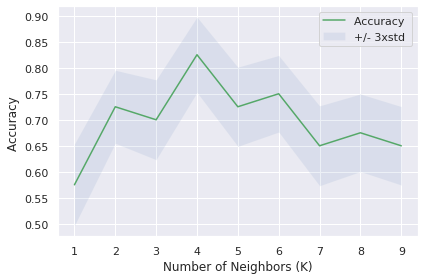

In [28]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [29]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.825 with k= 4


In [30]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.83      0.73      0.77        33
           2       0.18      0.29      0.22         7

   micro avg       0.65      0.65      0.65        40
   macro avg       0.50      0.51      0.50        40
weighted avg       0.71      0.65      0.68        40



In [31]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.65

In [32]:

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,2]))

[[24  9]
 [ 5  2]]


Confusion matrix, without normalization
[[24  9]
 [ 5  2]]


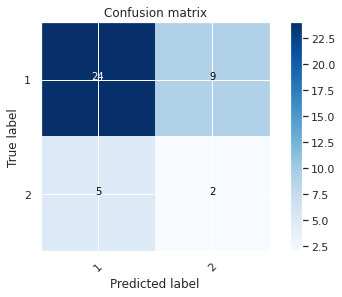

In [33]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=1)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1','2'],normalize= False,  title='Confusion matrix')

In [34]:
#Using Decision Trees
from sklearn.tree import DecisionTreeClassifier
decTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
decTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [35]:
decTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [36]:
predTree = decTree.predict(X_test)
print (predTree [0:5])
print (y_test [0:5])


[1 1 2 2 1]
[[1]
 [1]
 [2]
 [1]
 [1]]


In [37]:
df=pd.read_csv("Zip_Codes.csv")
df.head()
df.shape

(55, 2)

In [38]:

import pandas as pd
# File with zipcodes+neighborhood
df_zip = pd.read_csv("Zip_Codes.csv")

# File with zipcodes+latitudes+longitudes
df_zip_db = pd.read_csv("zip_LL.csv")
df_zip_db = df_zip_db[["Zip","Latitude","Longitude"]]

df_zip_db["Zip"] = df_zip_db["Zip"].astype(int)
lat = []
long = []
for i,row in df_zip.iterrows():
    curr = df_zip_db.loc[df_zip_db["Zip"] == row[0]]
    lat.append(curr["Latitude"].values)  
    long.append(curr["Longitude"].values)
    
df_zip["Latitude"]=lat
df_zip["Longitude"]=long

df_zip["Latitude"]=df_zip["Latitude"].astype(float)
df_zip["Longitude"]=df_zip["Longitude"].astype(float)

# Combined file zipcodes+neighborhood+latitudes+longitudes
df_zip.head()

#removing duplicates
actual=df_zip.drop_duplicates(subset="zipcode", keep='first', inplace=False)
#abc = df_zip["zipcode"].unique()
actual.drop_duplicates(subset="zipcode", keep='first', inplace=True)
actual.sort_values("zipcode")
df_zip = actual
df_zip.head()


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,zipcode,Neighborhood,Latitude,Longitude
0,98101,Downtown,47.61067,-122.33438
1,98102,Capitol Hill/Eastlake,47.63287,-122.32253
2,98104,Downtown/ID,47.60252,-122.32855
3,98106,Delridge,47.53282,-122.35443
4,98107,Ballard,47.66747,-122.37468


In [39]:
seattle_data = df_zip
df_zip


,zipcode,Neighborhood,Latitude,Longitude
0,98101,Downtown,47.610670,-122.334380
1,98102,Capitol Hill/Eastlake,47.632870,-122.322530
2,98104,Downtown/ID,47.602520,-122.328550
3,98106,Delridge,47.532820,-122.354430
4,98107,Ballard,47.667470,-122.374680
5,98108,S. Beacon Hill/South Park,47.546188,-122.315140
6,98109,Interbay/Queen Anne,47.630648,-122.346750
7,98118,Rainier Valley/Rainier Beach,47.543348,-122.274960
8,98121,Belltown,47.614870,-122.345780
9,98122,Central District,47.611570,-122.304060


In [40]:
lat = 47.63
lng = -122.32
map_seattle = folium.Map(location = [lat, lng], zoom_start=12)
sf_data = seattle_data

# add markers to map
for lat, lng, neighborhood in zip(sf_data['Latitude'], sf_data['Longitude'], sf_data['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        popup = label,
        color = 'blue',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(map_seattle)  
    


In [41]:
map_seattle
#df.head()

In [42]:
import requests

CLIENT_ID = 'KQBEWIEMK4ZVCVBP53Y4IGP1K3X5I0XEUQQUPG4DZGLRRHHR' # your Foursquare ID
CLIENT_SECRET = 'DAURWVNNLJSMIDEQ5C5FSNZ33NV3JQEVK0OPCUN5SWUPPKE0' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KQBEWIEMK4ZVCVBP53Y4IGP1K3X5I0XEUQQUPG4DZGLRRHHR
CLIENT_SECRET:DAURWVNNLJSMIDEQ5C5FSNZ33NV3JQEVK0OPCUN5SWUPPKE0


In [43]:
def getNeighborhood(latitudes, longitudes, radius=500):
    venues_list=[]
    for lat, lng in zip(latitudes, longitudes):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([( 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

In [44]:
Neighborhoods = getNeighborhood(latitudes = seattle_data['Latitude'],
                                   longitudes = seattle_data['Longitude']
                                  )
                                  
Neighborhoods.head()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,47.61067,-122.33438,The 5th Avenue Theatre,47.608996,-122.334162,Theater
1,47.61067,-122.33438,Gene Juarez Salon & Spa,47.612329,-122.334820,Salon / Barbershop
2,47.61067,-122.33438,Monorail Espresso,47.610828,-122.335048,Coffee Shop
3,47.61067,-122.33438,Veggie Grill,47.609882,-122.336637,Vegetarian / Vegan Restaurant
4,47.61067,-122.33438,Nordstrom,47.611866,-122.336411,Women's Store


In [45]:
Neighborhoods.shape

(797, 6)

In [46]:
# seattle_venues.shape = (1139, 7)
df_actual_1000 = df_actual.head(1000)

print(df_actual_200.head())


            X          Y  ROADCOND  WEATHER  JUNCTIONTYPE  SEVERITYCODE
0 -122.323148  47.703140         6        3             1             2
1 -122.347294  47.647172         6        5             4             1
2 -122.334540  47.607871         0        3             4             1
3 -122.334803  47.604803         0        1             4             1
4 -122.306426  47.545739         6        5             1             2


In [47]:
df_zip.head() #zipcode, neighborhood, Latitude, Longitude
df_zip.shape #40,4
#df_actual_200.head()

<h1><b>Predictive Modelling<b></h1>
    <h2>K-Nearest Neighbour Classifier</h2>

In [48]:
from sklearn.neighbors import KNeighborsClassifier
k = 3
X_train = df_zip[["Latitude","Longitude"]]
y_train = df_zip[["zipcode"]]
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [49]:
X_test = df_actual_200[["Y","X"]]
yhat = neigh.predict(X_test)
yhat.shape

#yhat is the list of zipcodes of the neighborhood

(200,)

In [50]:
df_actual_200["ZIPCODE"] = yhat
N = []
df_actual_200.head()
df_zip["zipcode"] = df_zip["zipcode"].astype(str)
df_zip.set_index('zipcode', inplace=True)

for z in df_actual_200["ZIPCODE"]:
    x = str(z)
    #print(x)
    #print(df_zip["Neighborhood"].loc[x])
    N.append(df_zip["Neighborhood"].loc[x])
    


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
df_actual_200["NEIGHBORHOOD"] = N

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
#df_zip.head()
#df_actual_200 = df_actual_200.rename(columns = {'zipcode': 'ZIPCODE', 'Neighborhood': 'NEIGHBORHOOD'}, inplace = False)
df_actual_200["ZIPCODE"] = df_actual_200["ZIPCODE"].astype(str)
df_actual_200.head(10)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,X,Y,ROADCOND,WEATHER,JUNCTIONTYPE,SEVERITYCODE,ZIPCODE,NEIGHBORHOOD
0,-122.323148,47.703140,6,3,1,2,98103,Greenwood
1,-122.347294,47.647172,6,5,4,1,98102,Capitol Hill/Eastlake
2,-122.334540,47.607871,0,3,4,1,98101,Downtown
3,-122.334803,47.604803,0,1,4,1,98101,Downtown
4,-122.306426,47.545739,6,5,1,2,98108,S. Beacon Hill/South Park
5,-122.387598,47.690575,0,1,1,1,98103,Greenwood
6,-122.338485,47.618534,6,5,1,1,98101,Downtown
7,-122.320780,47.614076,0,1,1,2,98101,Downtown
8,-122.335930,47.611904,0,1,4,1,98101,Downtown
9,-122.384700,47.528475,0,1,1,2,98106,Delridge


In [53]:
df_actual_200.dtypes

X               float64
Y               float64
ROADCOND           int8
WEATHER            int8
JUNCTIONTYPE       int8
SEVERITYCODE      int64
ZIPCODE          object
NEIGHBORHOOD     object
dtype: object

In [54]:
X_data = df_actual_200[['ZIPCODE','ROADCOND','WEATHER','JUNCTIONTYPE']].values
y_data = df_actual_200['SEVERITYCODE']


In [55]:
X = preprocessing.StandardScaler().fit(X_data).transform(X_data.astype(float))
X[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.2,  2. ,  0.8, -1.2],
       [-0.6,  2. ,  2.3,  1. ],
       [-0.9, -0.5,  0.8,  1. ],
       [-0.9, -0.5, -0.6,  1. ],
       [ 1.4,  2. ,  2.3, -1.2]])

In [56]:
X_train, X_test, y_train, y_test = train_test_split( X, y_data, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 4) (160,)
Test set: (40, 4) (40,)


In [57]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
#Train Model and Predict  
knn_model = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [58]:
y_hat = knn_model.predict(X_test)
y_hat[0:5]

array([1, 1, 1, 2, 1])

In [59]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_hat))

Train set Accuracy:  0.7125
Test set Accuracy:  0.775


In [71]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    print(mean_acc[n-1])
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])


0.65
0.775
0.675
0.775
0.75
0.75
0.725
0.725
0.75


In [81]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.figure(figsize=(1,1))
plt.show()

In [85]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_hat, labels=[1,2]))


[[28  5]
 [ 4  3]]


In [84]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_hat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['severitycode=1','severitycode=2'],normalize= False,  title='Confusion matrix')

              precision    recall  f1-score   support

           1       0.88      0.85      0.86        33
           2       0.38      0.43      0.40         7

   micro avg       0.78      0.78      0.78        40
   macro avg       0.62      0.64      0.63        40
weighted avg       0.79      0.78      0.78        40

Confusion matrix, without normalization
[[28  5]
 [ 4  3]]


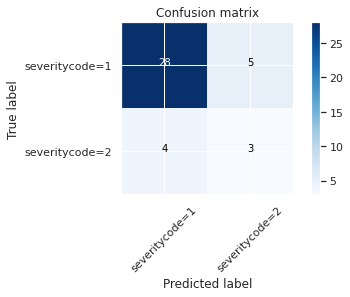

In [83]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, y_hat)

0.775

<h2><b>Decision Tree Classifier</b></h2>

In [68]:
from sklearn.tree import DecisionTreeClassifier
decTreeClass = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
decTreeClass.fit(X_train,y_train)
predTreeClass = decTreeClass.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTreeClass))

In [88]:
jaccard_similarity_score(y_test, predTreeClass)
print (classification_report(y_test, predTreeClass))
print(confusion_matrix(y_test, predTreeClass, labels=[1,2]))

              precision    recall  f1-score   support

           1       0.87      0.79      0.83        33
           2       0.30      0.43      0.35         7

   micro avg       0.72      0.72      0.73        40
   macro avg       0.58      0.61      0.59        40
weighted avg       0.77      0.72      0.74        40

[[26  7]
 [ 4  3]]


<h2><b>Logistic Regression </b></h2>

In [72]:
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LogReg = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LogReg

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [76]:
yhat_LR = LogReg.predict(X_test)
#yhat_LR[0:5]
yhat_prob = LogReg.predict_proba(X_test)
yhat_prob[0:5]

array([[0.6, 0.4],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.5, 0.5],
       [0.6, 0.4]])

In [77]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat_LR)

0.675

[[25  8]
 [ 5  2]]
Confusion matrix, without normalization
[[25  8]
 [ 5  2]]


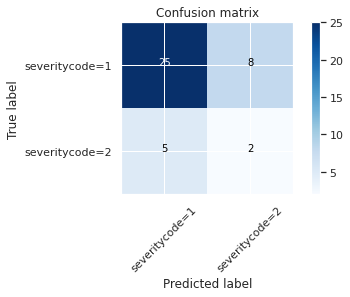

In [78]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat_LR, labels=[1,2]))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_LR, labels=[1,2])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['severitycode=1','severitycode=2'],normalize= False,  title='Confusion matrix')

In [79]:
print (classification_report(y_test, yhat_LR))

              precision    recall  f1-score   support

           1       0.83      0.76      0.79        33
           2       0.20      0.29      0.24         7

   micro avg       0.68      0.68      0.68        40
   macro avg       0.52      0.52      0.51        40
weighted avg       0.72      0.68      0.70        40



<h2><b>Modeling (SVM with Scikit-learn)</b></h2>

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           1       0.85      0.85      0.85        33
           2       0.29      0.29      0.29         7

   micro avg       0.75      0.75      0.75        40
   macro avg       0.57      0.57      0.57        40
weighted avg       0.75      0.75      0.75        40

Confusion matrix, without normalization
[[28  5]
 [ 5  2]]


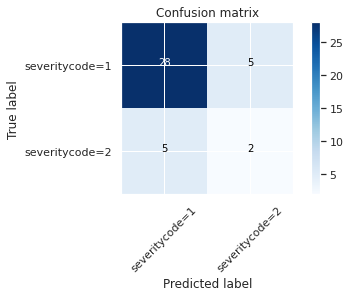

In [80]:
from sklearn import svm
sc_svm = svm.SVC(kernel='rbf')#polynomial, linear, rbf, sigmoid
sc_svm.fit(X_train, y_train) 
yhat_svm = sc_svm.predict(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_svm, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_svm))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['severitycode=1','severitycode=2'],normalize= False,  title='Confusion matrix')

In [89]:
jaccard_similarity_score(y_test, yhat_svm)

0.75

In [62]:
df_actual_200.groupby(['NEIGHBORHOOD']).mean()

,X,Y,ROADCOND,WEATHER,JUNCTIONTYPE,SEVERITYCODE
NEIGHBORHOOD,,,,,,
Ballard,-122.379766,47.648799,0.000000,1.000000,3.500000,2.000000
Capitol Hill/Eastlake,-122.314881,47.656124,2.400000,2.500000,2.700000,1.250000
Delridge,-122.357235,47.541884,1.333333,1.888889,2.722222,1.277778
Downtown,-122.331950,47.610897,1.525424,1.983051,2.610169,1.271186
Downtown/ID,-122.310675,47.592885,0.000000,1.125000,2.875000,1.312500
Greenwood,-122.342581,47.690509,0.837209,1.604651,2.534884,1.372093
Interbay/Queen Anne,-122.373915,47.630880,0.000000,1.000000,4.000000,1.000000
Rainier Valley/Rainier Beach,-122.264594,47.523882,0.000000,1.000000,4.000000,1.000000
S. Beacon Hill/South Park,-122.294045,47.550836,0.857143,1.857143,2.357143,1.285714


In [63]:
df_actual_200.groupby(['ROADCOND']).mean()

,X,Y,WEATHER,JUNCTIONTYPE,SEVERITYCODE
ROADCOND,,,,,
0,-122.333987,47.616440,1.198758,2.602484,1.347826
6,-122.330641,47.615738,4.282051,2.769231,1.153846


In [64]:
df_actual_200.groupby(['JUNCTIONTYPE']).mean()

,X,Y,ROADCOND,WEATHER,SEVERITYCODE
JUNCTIONTYPE,,,,,
0,-122.319209,47.547139,0.000000,1.000000,1.500000
1,-122.332080,47.617801,1.150685,1.931507,1.369863
2,-122.329936,47.655038,1.000000,1.500000,1.416667
3,-122.336383,47.605003,0.545455,1.454545,1.454545
4,-122.334363,47.614245,1.384615,1.835165,1.208791


In [65]:
df_actual_200.groupby(['WEATHER']).mean()

,X,Y,ROADCOND,JUNCTIONTYPE,SEVERITYCODE
WEATHER,,,,,
1,-122.334322,47.616939,0.041096,2.691781,1.349315
3,-122.333121,47.615423,2.571429,2.178571,1.250000
5,-122.328023,47.613679,6.000000,2.807692,1.153846


## ROC Curve ##

In [91]:
# predict probabilities
pred_prob1 = knn_model.predict_proba(X_test)
pred_prob2 = decTreeClass.predict_proba(X_test)
pred_prob3 = LogReg.predict_proba(X_test)
#pred_prob4 = sc_svm.predict_proba(X_test)

from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
#fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
#auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])

print(auc_score1, auc_score2, auc_score3)

0.6948051948051948 0.6298701298701298 0.6536796536796536


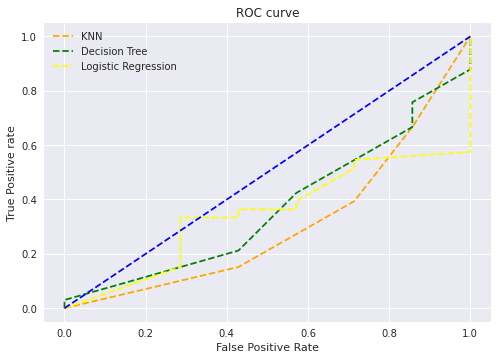

In [92]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='KNN')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Decision Tree')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();